# ASTRO 533 - Project 3

**Created:** Sep. 2020   
**Last Edit:** Sep. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

## Load packages and read data

In [173]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table as tb
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Anglesfrom astropy.coordinates 
import astropy.units as u
plt.style.use('bill')

gaiarv_cat = tb.read('./glt21_m45.fits', format='fits')
gaiarv_cat_m22 = tb.read('./glt21_m22.fits', format='fits')

## Task 1
### Find Pleiades

In [176]:
# selection criteria is the same as project 1

m45ra = 15 * (3 + (47/60) + (24/3600)) # RA = 3h 47m 24s
m45dec = 24 + (7/60) + (0/3600) # Dec = 24deg 7min 0sec

m45_index, = np.where((abs(gaiarv_cat['ra']-m45ra) < 3) & (abs(gaiarv_cat['dec']-m45dec) < 3) &
                       (abs(gaiarv_cat['pmra']-20) < 5) & (abs(gaiarv_cat['pmdec']+45) < 5) &
                       (abs(gaiarv_cat['parallax']-7.3) < 0.7))
print('Number of candidates:', len(m45_index))

Number of candidates: 1033


In [177]:
# distance estimation

d_m45 = 1000 / (gaiarv_cat['parallax'][m45_index]) # pc
print('Estimation of mean distance (in pc):', np.mean(d_m45))

Estimation of mean distance (in pc): 136.4888513945702


### Find M22

In [178]:
# final selection criteria is the same as project 1

m22_index, = np.where((abs(gaiarv_cat_m22['pmra']-10) < 1) & (abs(gaiarv_cat_m22['pmdec']+5.5) < 1))
print('Number of candidates:', len(m22_index))

Number of candidates: 4176


### Luminosity distribution

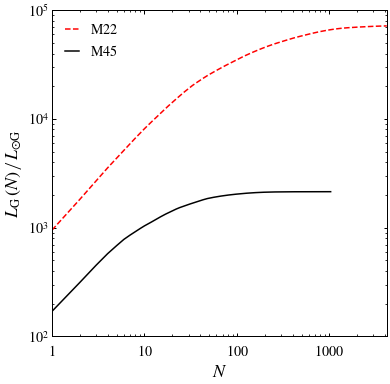

In [185]:
fig, ax1 = plt.subplots(figsize=(6,6))

l_m45 = 10**( 0.4 * (5.2-absmag_m45) ) # in L_sun
l_m22 = 10**( 0.4 * (5.2-absmag_m22) )

cumsum_m45 = np.cumsum(np.sort(l_m45)[::-1])
cumsum_m22 = np.cumsum(np.sort(l_m22)[::-1])

ax1.loglog(range(1, len(l_m22)+1), cumsum_m22, c='r', ls='--', label=r'$\mathrm{M22}$')
ax1.loglog(range(1, len(l_m45)+1), cumsum_m45, c='k', ls='-', label=r'$\mathrm{M45}$')

ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$\left.L_\mathrm{G}\,(N)\,\right/\,L_{\odot\mathrm{G}}$')
ax1.set_xlim(1, len(l_m22)+1)
ax1.set_ylim(1e2, 1e5)
ax1.set_xticks([1, 1e1, 1e2, 1e3])
ax1.set_xticklabels([r'$1$', r'$10$', r'$100$', r'$1000$'])
ax1.set_yticks([1e2, 1e3, 1e4, 1e5])
ax1.set_yticklabels([r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
ax1.legend(loc=2)

plt.savefig('./figures/luminosity.pdf')
plt.show()

### Integrated values

In [165]:
absmag_tot_m45 = 5.2 - 2.5*np.log10(cumsum_m45[-1])
absmag_tot_m22 = 5.2 - 2.5*np.log10(cumsum_m22[-1])

# integrated BP
absmag_bp_m45 = gaiarv_cat['bp_g'][m45_index] + gaiarv_cat['phot_g_mean_mag'][m45_index] - \
    5*np.log10(d_m45/10)
absmag_bp_m22 = gaiarv_cat_m22['bp_g'][m22_index] + gaiarv_cat_m22['phot_g_mean_mag'][m22_index] - \
    5*np.log10(d_m22*1000/10)

l_bp_m45 = 10**( 0.4 * (5.2-absmag_bp_m45) ) # in L_sun
l_bp_m22 = 10**( 0.4 * (5.2-absmag_bp_m22) )

sum_bp_m45 = np.sum(l_bp_m45)
sum_bp_m22 = np.sum(l_bp_m22)

absmag_bp_tot_m45 = 5.2 - 2.5*np.log10(sum_bp_m45)
absmag_bp_tot_m22 = 5.2 - 2.5*np.log10(sum_bp_m22)

# integrated RP
absmag_rp_m45 = -gaiarv_cat['g_rp'][m45_index] + gaiarv_cat['phot_g_mean_mag'][m45_index] - \
    5*np.log10(d_m45/10)
absmag_rp_m22 = -gaiarv_cat_m22['g_rp'][m22_index] + gaiarv_cat_m22['phot_g_mean_mag'][m22_index] - \
    5*np.log10(d_m22*1000/10)

l_rp_m45 = 10**( 0.4 * (5.2-absmag_rp_m45) ) # in L_sun
l_rp_m22 = 10**( 0.4 * (5.2-absmag_rp_m22) )

sum_rp_m45 = np.sum(l_rp_m45)
sum_rp_m22 = np.sum(l_rp_m22)

absmag_rp_tot_m45 = 5.2 - 2.5*np.log10(sum_rp_m45)
absmag_rp_tot_m22 = 5.2 - 2.5*np.log10(sum_rp_m22)

# integrated BP-RP
absmag_bp_rp_tot_m45 = absmag_bp_tot_m45 - absmag_rp_tot_m45
absmag_bp_rp_tot_m22 = absmag_bp_tot_m22 - absmag_rp_tot_m22

### Color-magnitude diagrams

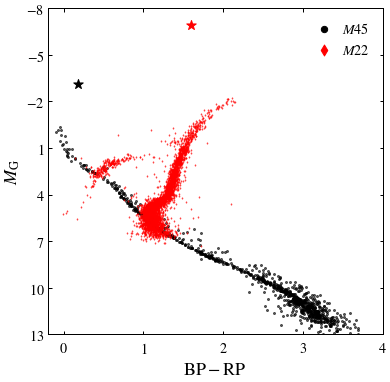

In [187]:
fig, ax = plt.subplots(figsize=(6,6))

d_m22 = 3 # kpc
absmag_m45 = gaiarv_cat['phot_g_mean_mag'][m45_index] - 5*np.log10(d_m45/10) # absolute magnitude of m45
absmag_m22 = gaiarv_cat_m22['phot_g_mean_mag'][m22_index] - 5*np.log10(d_m22*1000/10) # absolute magnitude of m22

ax.scatter(gaiarv_cat['bp_rp'][m45_index], absmag_m45, c='k', s=4, alpha=0.6, label=None)
ax.scatter(gaiarv_cat_m22['bp_rp'][m22_index], absmag_m22, marker='d', c='r', s=1, alpha=0.6, label=None)

ax.scatter(absmag_bp_rp_tot_m45, absmag_tot_m45, c='k', s=100, marker='*')
ax.scatter(absmag_bp_rp_tot_m22, absmag_tot_m22, c='r', s=100, marker='*')

ax.set_xlabel(r'$\mathrm{BP-RP}$')
ax.set_ylabel(r'$M_\mathrm{G}$')
ax.set_xlim(-0.2, 4)
ax.set_ylim(13, -8)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$'])
ax.set_yticks([-8, -5, -2, 1, 4, 7, 10, 13])
ax.set_yticklabels([r'$-8$', r'$-5$', r'$-2$', r'$1$', r'$4$', r'$7$', r'$10$', r'$13$'])

ax.scatter([], [], c='k', s=40, label=r'$M45$')
ax.scatter([], [], c='r', s=60, marker='d', label=r'$M22$')
plt.legend(loc=1)

plt.savefig('./figures/color-M.pdf')
plt.show()

## Task 2

In [256]:

r_1 = np.linspace(-1, 1, 100)
r_2 = np.linspace(-3, -1, 100)
r_3 = np.linspace(1, 3, 100)

# density profile in 3M/4 pi a^3
rho_1_1 = np.zeros(len(r_1)) # point charge
rho_1_2 = np.zeros(len(r_2)) # point charge
rho_1_3 = np.zeros(len(r_3)) # point charge

rho_2_1 = 1/(r_1*r_1)/3 # isothermal
rho_2_2 = np.zeros(len(r_2)) # isothermal
rho_2_3 = np.zeros(len(r_3)) # isothermal

rho_3_1 = np.ones(len(r_1)) # top-hat
rho_3_2 = np.zeros(len(r_2)) # top-hat
rho_3_3 = np.zeros(len(r_3)) # top-hat

# cumulative mass profile [M(<r) as a function of r] in M
M_1_1 = np.ones(len(r_1)) # point charge
M_1_2 = np.ones(len(r_2)) # point charge
M_1_3 = np.ones(len(r_2)) # point charge

M_2_1 = np.abs(r_1) # isothermal
M_2_2 = np.ones(len(r_2)) 
M_2_3 = np.ones(len(r_2)) 

M_3_1 = np.abs(r_1)**3 # top-hat
M_3_2 = np.ones(len(r_2)) 
M_3_3 = np.ones(len(r_2)) 

# circular velocity profile in sqrt(GM/a)
v_1_1 = np.abs(r_1)**(-1/2) # point charge
v_1_2 = np.abs(r_2)**(-1/2) # point charge
v_1_3 = np.abs(r_3)**(-1/2) # point charge

v_2_1 = np.ones(len(r_1))
v_2_2 = np.abs(r_2)**(-1/2) # isothermal
v_2_3 = np.abs(r_3)**(-1/2) # isothermal

v_3_1 = np.abs(r_1)
v_3_2 = np.abs(r_2)**(-1/2) # top-hat
v_3_3 = np.abs(r_3)**(-1/2) # top-hat

# potential profile in GM/a
phi_1_1 = -1/np.abs(r_1) # point charge
phi_1_2 = -1/np.abs(r_2)
phi_1_3 = -1/np.abs(r_3)

phi_2_1 = np.log(np.abs(r_1)) - 1
phi_2_2 = -1/np.abs(r_2) # isothermal
phi_2_3 = -1/np.abs(r_3)

phi_3_1 = np.abs(r_1)**2/2 - 3/2
phi_3_2 = -1/np.abs(r_2) # top-hat
phi_3_3 = -1/np.abs(r_3)

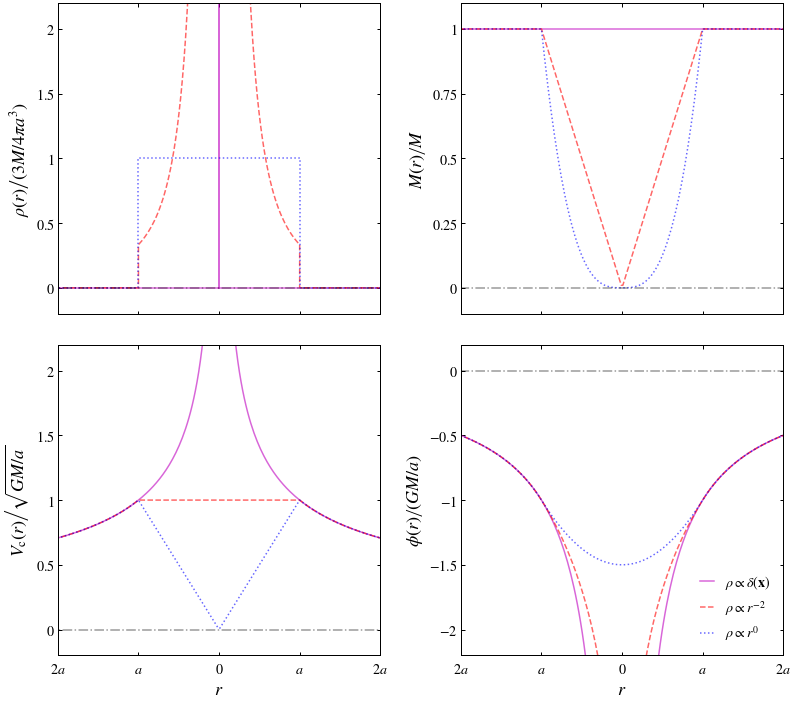

In [319]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(13,12),sharex=True)
fig.subplots_adjust(wspace=0.25)
fig.subplots_adjust(hspace=0.1)
alpha_set = 0.6

ax1.plot(np.append(r_2,[r_1,r_3]), np.append(rho_1_2,[rho_1_1,rho_1_3]), c='m', ls='-', alpha=alpha_set)
ax1.plot([0,0,0], [0,5,0], c='m', ls='-', alpha=alpha_set)
ax1.plot(np.append(r_2,[r_1,r_3]), np.append(rho_2_2,[rho_2_1,rho_2_3]), c='r', ls='--', alpha=alpha_set)
ax1.plot(np.append(r_2,[r_1,r_3]), np.append(rho_3_2,[rho_3_1,rho_3_3]), c='b', ls=':', alpha=alpha_set)
ax1.plot([-3,3], [0,0], c='k', ls='-.', alpha=alpha_set-0.2)

ax2.plot(np.append(r_2,[r_1,r_3]), np.append(M_1_2,[M_1_1,M_1_3]), c='m', ls='-', alpha=alpha_set)
ax2.plot(np.append(r_2,[r_1,r_3]), np.append(M_2_2,[M_2_1,M_2_3]), c='r', ls='--', alpha=alpha_set)
ax2.plot(np.append(r_2,[r_1,r_3]), np.append(M_3_2,[M_3_1,M_3_3]), c='b', ls=':', alpha=alpha_set)
ax2.plot([-3,3], [0,0], c='k', ls='-.', alpha=alpha_set-0.2)

ax3.plot(np.append(r_2,[r_1,r_3]), np.append(v_1_2,[v_1_1,v_1_3]), c='m', ls='-', alpha=alpha_set)
ax3.plot(np.append(r_2,[r_1,r_3]), np.append(v_2_2,[v_2_1,v_2_3]), c='r', ls='--', alpha=alpha_set)
ax3.plot(np.append(r_2,[r_1,r_3]), np.append(v_3_2,[v_3_1,v_3_3]), c='b', ls=':', alpha=alpha_set)
ax3.plot([-3,3], [0,0], c='k', ls='-.', alpha=alpha_set-0.2)

ax4.plot(np.append(r_2,[r_1,r_3]), np.append(phi_1_2,[phi_1_1,phi_1_3]), c='m', ls='-', alpha=alpha_set, label=r'$\rho\propto\delta(\mathbf{x})$')
ax4.plot(np.append(r_2,[r_1,r_3]), np.append(phi_2_2,[phi_2_1,phi_2_3]), c='r', ls='--', alpha=alpha_set, label=r'$\rho\propto r^{-2}$')
ax4.plot(np.append(r_2,[r_1,r_3]), np.append(phi_3_2,[phi_3_1,phi_3_3]), c='b', ls=':', alpha=alpha_set, label=r'$\rho\propto r^0$')
ax4.plot([-3,3], [0,0], c='k', ls='-.', alpha=alpha_set-0.2, label=None)

ax3.set_xlabel(r'$r$')
ax4.set_xlabel(r'$r$')

ax1.set_ylabel(r'$\rho(r)\left/(3M/4 \pi a^3)\right.$')
ax2.set_ylabel(r'$\left.M(r)\right/M$')
ax3.set_ylabel(r'$V_\mathrm{c}(r)\left/\sqrt{GM/a}\right.$')
ax4.set_ylabel(r'$\left.\phi(r)\right/(GM/a)$')

ax1.set_xlim(-2, 2)
ax1.set_xticks([-2, -1, 0, 1, 2])
ax1.set_xticklabels([r'$2a$', r'$a$', r'$0$', r'$a$', r'$2a$'])

ax1.set_ylim(-0.2, 2.2)
ax1.set_yticks([0, 0.5, 1, 1.5, 2])
ax1.set_yticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])
ax2.set_ylim(-0.1, 1.1)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax2.set_yticklabels([r'$0$', r'$0.25$', r'$0.5$', r'$0.75$', r'$1$'])
ax3.set_ylim(-0.2, 2.2)
ax3.set_yticks([0, 0.5, 1, 1.5, 2])
ax3.set_yticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])
ax4.set_ylim(-2.2, 0.2)
ax4.set_yticks([0, -0.5, -1, -1.5, -2])
ax4.set_yticklabels([r'$0$', r'$-0.5$', r'$-1$', r'$-1.5$', r'$-2$'])

ax4.legend(loc=4)

plt.savefig('./figures/profiles.pdf')
plt.show()